In [3]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import cv2
import matplotlib.pyplot as plt

# Provide cv2_imshow for local (non-Colab) environments
def cv2_imshow(img):
	"""Display an image (replacement for google.colab.patches.cv2_imshow)."""
	if img is None:
		return
	# If image is BGR (OpenCV default) convert to RGB for matplotlib
	if hasattr(img, 'shape') and len(img.shape) == 3 and img.shape[2] == 3:
		img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	# For grayscale images matplotlib needs no color conversion
	cmap = 'gray' if (not hasattr(img, 'shape') or len(img.shape) < 3 or img.shape[2] == 1) else None
	plt.imshow(img, cmap=cmap)
	plt.axis('off')
	plt.show()
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [7]:
dataset_folder = 'dataset/train'  # Path to the dataset folder
subfolders = os.listdir(dataset_folder)
i = 0
last = []
images = []
labels = []
temp = subfolders
for subfolder in subfolders:
    subfolder_index = temp.index(subfolder)
    label = subfolder_index
    if label in [4,6]:
        new_label = 0
    elif label in [0,5]:
        new_label = 1
    else:
        new_label = 2
    __path__ = dataset_folder + '/' + subfolder   
    subfolder_image = os.listdir(__path__)
    for image in subfolder_image:
        image_path = __path__ + '/' + image
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (48, 48))
        images.append(img)
        labels.append(new_label)
        i+=1
    last.append(i)
image_x = np.array(images)
label_y = np.array(labels)

image_x = image_x/255.0
num_of_classes = 3
labels_y_encoded = tf.keras.utils.to_categorical(label_y,num_classes=num_of_classes)
X_train, X_test, Y_train, Y_test= train_test_split(image_x, labels_y_encoded,test_size=0.25, random_state=10)

         

In [8]:
input = Input(shape = (48,48,1))
conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)
conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)
conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)
conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)
flatten = Flatten()(pool4)
dense_1 = Dense(128,activation='relu')(flatten)
drop_1 = Dropout(0.2)(dense_1)
output = Dense(3,activation="sigmoid")(drop_1)

model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.summary()

# Configure Model Checkpoint
fle_s='./output/emotion_model.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,267 (2.61 MB)

 Trainable params: 683,267 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
save = model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test), callbacks=[callback_list])

Epoch 1/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3739 - loss: 1.1562
Epoch 1: loss improved from None to 1.10594, saving model to ./output/emotion_model.h5

Epoch 1: loss improved from None to 1.10594, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 51s 73ms/step - accuracy: 0.3938 - loss: 1.1059 - val_accuracy: 0.4373 - val_loss: 1.0698
Epoch 2/50
Epoch 2/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4414 - loss: 1.0615
Epoch 2: loss improved from 1.10594 to 1.04913, saving model to ./output/emotion_model.h5

Epoch 2: loss improved from 1.10594 to 1.04913, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 45s 69ms/step - accuracy: 0.4564 - loss: 1.0491 - val_accuracy: 0.4758 - val_loss: 1.0392
Epoch 3/50
Epoch 3/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4937 - loss: 1.0164
Epoch 3: loss improved from 1.04913 to 1.00562, saving model to ./output/emotion_model.h5

Epoch 3: loss improved from 1.04913 to 1.00562, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 76ms/step - accuracy: 0.5024 - loss: 1.0056 - val_accuracy: 0.5081 - val_loss: 0.9944
Epoch 4/50
Epoch 4/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5258 - loss: 0.9784
Epoch 4: loss improved from 1.00562 to 0.97088, saving model to ./output/emotion_model.h5

Epoch 4: loss improved from 1.00562 to 0.97088, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 65s 100ms/step - accuracy: 0.5281 - loss: 0.9709 - val_accuracy: 0.5372 - val_loss: 0.9673
Epoch 5/50
Epoch 5/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5358 - loss: 0.9504
Epoch 5: loss improved from 0.97088 to 0.94468, saving model to ./output/emotion_model.h5

Epoch 5: loss improved from 0.97088 to 0.94468, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 60s 92ms/step - accuracy: 0.5414 - loss: 0.9447 - val_accuracy: 0.5516 - val_loss: 0.9383
Epoch 6/50
Epoch 6/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5555 - loss: 0.9282
Epoch 6: loss improved from 0.94468 to 0.92370, saving model to ./output/emotion_model.h5

Epoch 6: loss improved from 0.94468 to 0.92370, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 55s 84ms/step - accuracy: 0.5583 - loss: 0.9237 - val_accuracy: 0.5613 - val_loss: 0.9333
Epoch 7/50
Epoch 7/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5694 - loss: 0.9046
Epoch 7: loss improved from 0.92370 to 0.90671, saving model to ./output/emotion_model.h5

Epoch 7: loss improved from 0.92370 to 0.90671, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - accuracy: 0.5664 - loss: 0.9067 - val_accuracy: 0.5581 - val_loss: 0.9244
Epoch 8/50
Epoch 8/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5736 - loss: 0.8987
Epoch 8: loss improved from 0.90671 to 0.89202, saving model to ./output/emotion_model.h5

Epoch 8: loss improved from 0.90671 to 0.89202, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step - accuracy: 0.5806 - loss: 0.8920 - val_accuracy: 0.5726 - val_loss: 0.8912
Epoch 9/50
Epoch 9/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5900 - loss: 0.8817
Epoch 9: loss improved from 0.89202 to 0.88639, saving model to ./output/emotion_model.h5

Epoch 9: loss improved from 0.89202 to 0.88639, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 62s 95ms/step - accuracy: 0.5849 - loss: 0.8864 - val_accuracy: 0.5745 - val_loss: 0.8940
Epoch 10/50
Epoch 10/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5904 - loss: 0.8744
Epoch 10: loss improved from 0.88639 to 0.87923, saving model to ./output/emotion_model.h5

Epoch 10: loss improved from 0.88639 to 0.87923, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 56s 87ms/step - accuracy: 0.5886 - loss: 0.8792 - val_accuracy: 0.5715 - val_loss: 0.9053
Epoch 11/50
Epoch 11/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5919 - loss: 0.8677
Epoch 11: loss improved from 0.87923 to 0.86843, saving model to ./output/emotion_model.h5

Epoch 11: loss improved from 0.87923 to 0.86843, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.5917 - loss: 0.8684 - val_accuracy: 0.5814 - val_loss: 0.8906
Epoch 12/50
Epoch 12/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6025 - loss: 0.8535
Epoch 12: loss improved from 0.86843 to 0.86075, saving model to ./output/emotion_model.h5

Epoch 12: loss improved from 0.86843 to 0.86075, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 54s 83ms/step - accuracy: 0.5992 - loss: 0.8607 - val_accuracy: 0.5879 - val_loss: 0.8766
Epoch 13/50
Epoch 13/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6073 - loss: 0.8528
Epoch 13: loss improved from 0.86075 to 0.85309, saving model to ./output/emotion_model.h5

Epoch 13: loss improved from 0.86075 to 0.85309, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 52s 80ms/step - accuracy: 0.6048 - loss: 0.8531 - val_accuracy: 0.5848 - val_loss: 0.8862
Epoch 14/50
Epoch 14/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6012 - loss: 0.8433
Epoch 14: loss improved from 0.85309 to 0.85002, saving model to ./output/emotion_model.h5

Epoch 14: loss improved from 0.85309 to 0.85002, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.6049 - loss: 0.8500 - val_accuracy: 0.5744 - val_loss: 0.8975
Epoch 15/50
Epoch 15/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6069 - loss: 0.8421
Epoch 15: loss improved from 0.85002 to 0.84443, saving model to ./output/emotion_model.h5

Epoch 15: loss improved from 0.85002 to 0.84443, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 51s 78ms/step - accuracy: 0.6095 - loss: 0.8444 - val_accuracy: 0.5912 - val_loss: 0.8652
Epoch 16/50
Epoch 16/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6167 - loss: 0.8391
Epoch 16: loss improved from 0.84443 to 0.84341, saving model to ./output/emotion_model.h5

Epoch 16: loss improved from 0.84443 to 0.84341, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 52s 80ms/step - accuracy: 0.6138 - loss: 0.8434 - val_accuracy: 0.5971 - val_loss: 0.8643
Epoch 17/50
Epoch 17/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6147 - loss: 0.8382
Epoch 17: loss improved from 0.84341 to 0.83904, saving model to ./output/emotion_model.h5

Epoch 17: loss improved from 0.84341 to 0.83904, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 51s 78ms/step - accuracy: 0.6153 - loss: 0.8390 - val_accuracy: 0.5946 - val_loss: 0.8666
Epoch 18/50
Epoch 18/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6211 - loss: 0.8315
Epoch 18: loss improved from 0.83904 to 0.83223, saving model to ./output/emotion_model.h5

Epoch 18: loss improved from 0.83904 to 0.83223, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 47s 72ms/step - accuracy: 0.6199 - loss: 0.8322 - val_accuracy: 0.5946 - val_loss: 0.8708
Epoch 19/50
Epoch 19/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6217 - loss: 0.8259
Epoch 19: loss improved from 0.83223 to 0.82700, saving model to ./output/emotion_model.h5

Epoch 19: loss improved from 0.83223 to 0.82700, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 75ms/step - accuracy: 0.6233 - loss: 0.8270 - val_accuracy: 0.6046 - val_loss: 0.8531
Epoch 20/50
Epoch 20/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6312 - loss: 0.8163
Epoch 20: loss improved from 0.82700 to 0.82496, saving model to ./output/emotion_model.h5

Epoch 20: loss improved from 0.82700 to 0.82496, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 76ms/step - accuracy: 0.6231 - loss: 0.8250 - val_accuracy: 0.5938 - val_loss: 0.8765
Epoch 21/50
Epoch 21/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6242 - loss: 0.8196
Epoch 21: loss improved from 0.82496 to 0.82327, saving model to ./output/emotion_model.h5

Epoch 21: loss improved from 0.82496 to 0.82327, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 75ms/step - accuracy: 0.6258 - loss: 0.8233 - val_accuracy: 0.5947 - val_loss: 0.8614
Epoch 22/50
Epoch 22/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6267 - loss: 0.8205
Epoch 22: loss improved from 0.82327 to 0.82167, saving model to ./output/emotion_model.h5

Epoch 22: loss improved from 0.82327 to 0.82167, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 50s 76ms/step - accuracy: 0.6273 - loss: 0.8217 - val_accuracy: 0.6048 - val_loss: 0.8554
Epoch 23/50
Epoch 23/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6294 - loss: 0.8156
Epoch 23: loss improved from 0.82167 to 0.81832, saving model to ./output/emotion_model.h5

Epoch 23: loss improved from 0.82167 to 0.81832, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 50s 77ms/step - accuracy: 0.6265 - loss: 0.8183 - val_accuracy: 0.5840 - val_loss: 0.8921
Epoch 24/50
Epoch 24/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6381 - loss: 0.8050
Epoch 24: loss improved from 0.81832 to 0.81200, saving model to ./output/emotion_model.h5

Epoch 24: loss improved from 0.81832 to 0.81200, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 76ms/step - accuracy: 0.6297 - loss: 0.8120 - val_accuracy: 0.6065 - val_loss: 0.8621
Epoch 25/50
Epoch 25/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6338 - loss: 0.8102
Epoch 25: loss did not improve from 0.81200
651/651 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.6349 - loss: 0.8132 - val_accuracy: 0.6033 - val_loss: 0.8587
Epoch 26/50

Epoch 25: loss did not improve from 0.81200
651/651 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.6349 - loss: 0.8132 - val_accuracy: 0.6033 - val_loss: 0.8587
Epoch 26/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6382 - loss: 0.8010
Epoch 26: loss improved from 0.81200 to 0.80866, saving model to ./output/emotion_model.h5

Epoch 26: loss improved from 0.81200 to 0.80866, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 57s 88ms/step - accuracy: 0.6343 - loss: 0.8087 - val_accuracy: 0.6039 - val_loss: 0.8651
Epoch 27/50
Epoch 27/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6377 - loss: 0.8026
Epoch 27: loss did not improve from 0.80866
651/651 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.6356 - loss: 0.8092 - val_accuracy: 0.5960 - val_loss: 0.8917
Epoch 28/50

Epoch 27: loss did not improve from 0.80866
651/651 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.6356 - loss: 0.8092 - val_accuracy: 0.5960 - val_loss: 0.8917
Epoch 28/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6450 - loss: 0.7929
Epoch 28: loss improved from 0.80866 to 0.80442, saving model to ./output/emotion_model.h5

Epoch 28: loss improved from 0.80866 to 0.80442, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 46s 71ms/step - accuracy: 0.6391 - loss: 0.8044 - val_accuracy: 0.6088 - val_loss: 0.8612
Epoch 29/50
Epoch 29/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6441 - loss: 0.7997
Epoch 29: loss did not improve from 0.80442
651/651 ━━━━━━━━━━━━━━━━━━━━ 46s 71ms/step - accuracy: 0.6386 - loss: 0.8057 - val_accuracy: 0.5996 - val_loss: 0.8679
Epoch 30/50

Epoch 29: loss did not improve from 0.80442
651/651 ━━━━━━━━━━━━━━━━━━━━ 46s 71ms/step - accuracy: 0.6386 - loss: 0.8057 - val_accuracy: 0.5996 - val_loss: 0.8679
Epoch 30/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6478 - loss: 0.7975
Epoch 30: loss improved from 0.80442 to 0.80043, saving model to ./output/emotion_model.h5

Epoch 30: loss improved from 0.80442 to 0.80043, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 46s 71ms/step - accuracy: 0.6459 - loss: 0.8004 - val_accuracy: 0.6039 - val_loss: 0.8657
Epoch 31/50
Epoch 31/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6439 - loss: 0.7960
Epoch 31: loss did not improve from 0.80043
651/651 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.6419 - loss: 0.8029 - val_accuracy: 0.5897 - val_loss: 0.9072
Epoch 32/50

Epoch 31: loss did not improve from 0.80043
651/651 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.6419 - loss: 0.8029 - val_accuracy: 0.5897 - val_loss: 0.9072
Epoch 32/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6517 - loss: 0.7896
Epoch 32: loss improved from 0.80043 to 0.79577, saving model to ./output/emotion_model.h5

Epoch 32: loss improved from 0.80043 to 0.79577, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 52s 80ms/step - accuracy: 0.6498 - loss: 0.7958 - val_accuracy: 0.6032 - val_loss: 0.8709
Epoch 33/50
Epoch 33/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6510 - loss: 0.7895
Epoch 33: loss improved from 0.79577 to 0.79537, saving model to ./output/emotion_model.h5

Epoch 33: loss improved from 0.79577 to 0.79537, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 56s 86ms/step - accuracy: 0.6458 - loss: 0.7954 - val_accuracy: 0.6129 - val_loss: 0.8562
Epoch 34/50
Epoch 34/50
651/651 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6515 - loss: 0.7940
Epoch 34: loss improved from 0.79537 to 0.79464, saving model to ./output/emotion_model.h5

Epoch 34: loss improved from 0.79537 to 0.79464, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 54s 83ms/step - accuracy: 0.6479 - loss: 0.7946 - val_accuracy: 0.6186 - val_loss: 0.8574
Epoch 35/50
Epoch 35/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6558 - loss: 0.7922
Epoch 35: loss did not improve from 0.79464
651/651 ━━━━━━━━━━━━━━━━━━━━ 54s 82ms/step - accuracy: 0.6478 - loss: 0.7953 - val_accuracy: 0.6231 - val_loss: 0.8500
Epoch 36/50

Epoch 35: loss did not improve from 0.79464
651/651 ━━━━━━━━━━━━━━━━━━━━ 54s 82ms/step - accuracy: 0.6478 - loss: 0.7953 - val_accuracy: 0.6231 - val_loss: 0.8500
Epoch 36/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6491 - loss: 0.7870
Epoch 36: loss improved from 0.79464 to 0.79210, saving model to ./output/emotion_model.h5

Epoch 36: loss improved from 0.79464 to 0.79210, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 52s 79ms/step - accuracy: 0.6492 - loss: 0.7921 - val_accuracy: 0.6199 - val_loss: 0.8549
Epoch 37/50
Epoch 37/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6477 - loss: 0.7909
Epoch 37: loss improved from 0.79210 to 0.79021, saving model to ./output/emotion_model.h5

Epoch 37: loss improved from 0.79210 to 0.79021, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 52s 80ms/step - accuracy: 0.6498 - loss: 0.7902 - val_accuracy: 0.6240 - val_loss: 0.8441
Epoch 38/50
Epoch 38/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6596 - loss: 0.7871
Epoch 38: loss improved from 0.79021 to 0.78803, saving model to ./output/emotion_model.h5

Epoch 38: loss improved from 0.79021 to 0.78803, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 53s 81ms/step - accuracy: 0.6539 - loss: 0.7880 - val_accuracy: 0.6227 - val_loss: 0.8505
Epoch 39/50
Epoch 39/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6518 - loss: 0.7836
Epoch 39: loss improved from 0.78803 to 0.78661, saving model to ./output/emotion_model.h5

Epoch 39: loss improved from 0.78803 to 0.78661, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.6528 - loss: 0.7866 - val_accuracy: 0.6222 - val_loss: 0.8504
Epoch 40/50
Epoch 40/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6592 - loss: 0.7767
Epoch 40: loss improved from 0.78661 to 0.78130, saving model to ./output/emotion_model.h5

Epoch 40: loss improved from 0.78661 to 0.78130, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 76ms/step - accuracy: 0.6536 - loss: 0.7813 - val_accuracy: 0.6170 - val_loss: 0.8561
Epoch 41/50
Epoch 41/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6564 - loss: 0.7799
Epoch 41: loss did not improve from 0.78130
651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 75ms/step - accuracy: 0.6553 - loss: 0.7843 - val_accuracy: 0.6117 - val_loss: 0.8698
Epoch 42/50

Epoch 41: loss did not improve from 0.78130
651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 75ms/step - accuracy: 0.6553 - loss: 0.7843 - val_accuracy: 0.6117 - val_loss: 0.8698
Epoch 42/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6610 - loss: 0.7736
Epoch 42: loss improved from 0.78130 to 0.77928, saving model to ./output/emotion_model.h5

Epoch 42: loss improved from 0.78130 to 0.77928, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 76ms/step - accuracy: 0.6557 - loss: 0.7793 - val_accuracy: 0.6134 - val_loss: 0.8639
Epoch 43/50
Epoch 43/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6588 - loss: 0.7831
Epoch 43: loss did not improve from 0.77928
651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 76ms/step - accuracy: 0.6557 - loss: 0.7825 - val_accuracy: 0.6257 - val_loss: 0.8475
Epoch 44/50

Epoch 43: loss did not improve from 0.77928
651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 76ms/step - accuracy: 0.6557 - loss: 0.7825 - val_accuracy: 0.6257 - val_loss: 0.8475
Epoch 44/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6595 - loss: 0.7776
Epoch 44: loss did not improve from 0.77928
651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 75ms/step - accuracy: 0.6567 - loss: 0.7802 - val_accuracy: 0.6045 - val_loss: 0.8790
Epoch 45/50

Epoch 44: loss did not improve from 0.77928
651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 75ms/step - accuracy: 0.6567 - loss: 0.7802 - val_accuracy: 0.6045 - val_loss: 0.8790
Epoch 45/50
650

651/651 ━━━━━━━━━━━━━━━━━━━━ 50s 76ms/step - accuracy: 0.6570 - loss: 0.7768 - val_accuracy: 0.6208 - val_loss: 0.8514
Epoch 47/50
Epoch 47/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6691 - loss: 0.7609
Epoch 47: loss improved from 0.77684 to 0.77415, saving model to ./output/emotion_model.h5

Epoch 47: loss improved from 0.77684 to 0.77415, saving model to ./output/emotion_model.h5


651/651 ━━━━━━━━━━━━━━━━━━━━ 49s 76ms/step - accuracy: 0.6634 - loss: 0.7741 - val_accuracy: 0.6237 - val_loss: 0.8477
Epoch 48/50
Epoch 48/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6706 - loss: 0.7600
Epoch 48: loss did not improve from 0.77415
651/651 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.6625 - loss: 0.7746 - val_accuracy: 0.6258 - val_loss: 0.8464
Epoch 49/50

Epoch 48: loss did not improve from 0.77415
651/651 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.6625 - loss: 0.7746 - val_accuracy: 0.6258 - val_loss: 0.8464
Epoch 49/50
650/651 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6639 - loss: 0.7722
Epoch 49: loss did not improve from 0.77415
651/651 ━━━━━━━━━━━━━━━━━━━━ 50s 77ms/step - accuracy: 0.6626 - loss: 0.7767 - val_accuracy: 0.6225 - val_loss: 0.8466
Epoch 50/50

Epoch 49: loss did not improve from 0.77415
651/651 ━━━━━━━━━━━━━━━━━━━━ 50s 77ms/step - accuracy: 0.6626 - loss: 0.7767 - val_accuracy: 0.6225 - val_loss: 0.8466
Epoch 50/50
650

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

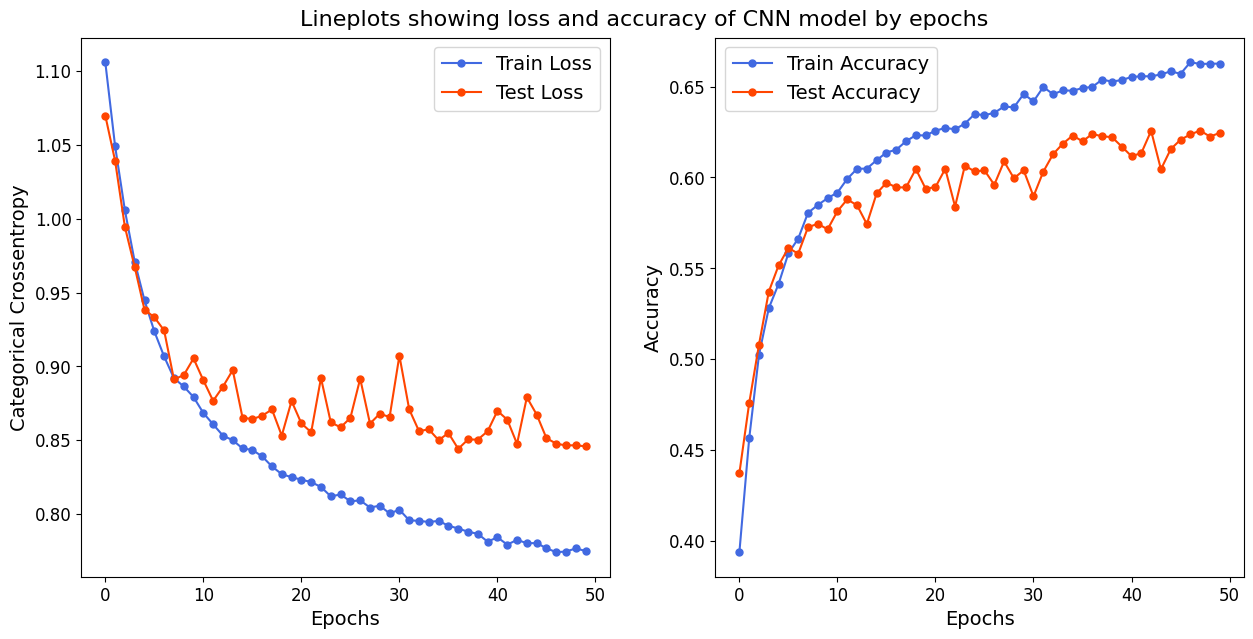

In [10]:
train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

# Plotting a line chart to visualize the loss and accuracy values by epochs.
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
ax = ax.ravel()
ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)
ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)
ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)
ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)
fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)


In [1]:
from tensorflow.keras.models import load_model
model = load_model('./output/emotion_model.h5')

In [32]:
import cv2
import numpy as np

# Load a new image
image_path = './test/happy.jpg'
img = cv2.imread(image_path)

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize to 48x48
img_resized = cv2.resize(img_gray, (48, 48))

# Normalize pixel values
img_normalized = img_resized / 255.0

# Reshape to match input shape: (1, 48, 48, 1)
img_input = np.reshape(img_normalized, (1, 48, 48, 1))

In [33]:
prediction = model.predict(img_input)

# Get the class with the highest probability
emotion_class = np.argmax(prediction)

# Map the class index to label
emotion_labels = {0: 'Happy', 1: 'Angry/Sad', 2: 'Neutral'}
predicted_emotion = emotion_labels[emotion_class]

print("Predicted Emotion:", predicted_emotion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Emotion: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Emotion: Happy


In [10]:
import os
dataset_folder = 'dataset/test'  # Path to the dataset folder
subfolders = os.listdir(dataset_folder)
i = 0
last = []
images = []
labels = []
temp = subfolders
for subfolder in subfolders:
    subfolder_index = temp.index(subfolder)
    label = subfolder_index
    if label in [4,6]:
        new_label = 0
    elif label in [0,5]:
        new_label = 1
    else:
        new_label = 2
    __path__ = dataset_folder + '/' + subfolder   
    subfolder_image = os.listdir(__path__)
    for image in subfolder_image:
        image_path = __path__ + '/' + image
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (48, 48))
        images.append(img)
        labels.append(new_label)
        i+=1
    last.append(i)
image_x = np.array(images)
label_y = np.array(labels)

image_x = image_x/255.0
num_of_classes = 3
labels_y_encoded = tf.keras.utils.to_categorical(label_y,num_classes=num_of_classes)
X_train, X_test, Y_train, Y_test= train_test_split(image_x, labels_y_encoded,test_size=0.2, random_state=10)

In [11]:
model = load_model('./output/emotion_model.h5')
for layer in model.layers:
    layer.trainable = False

In [12]:
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])


In [13]:
fle_s='./output/emotion_model.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]
save = model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test), callbacks=[callback_list])

Epoch 1/50
179/180 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5993 - loss: 0.8281
Epoch 1: loss improved from None to 0.83946, saving model to ./output/emotion_model.h5

Epoch 1: loss improved from None to 0.83946, saving model to ./output/emotion_model.h5


180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.5956 - loss: 0.8395 - val_accuracy: 0.6358 - val_loss: 0.7762
Epoch 2/50
Epoch 2/50
179/180 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5889 - loss: 0.8461
Epoch 2: loss improved from 0.83946 to 0.83620, saving model to ./output/emotion_model.h5

Epoch 2: loss improved from 0.83946 to 0.83620, saving model to ./output/emotion_model.h5


180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.5996 - loss: 0.8362 - val_accuracy: 0.6358 - val_loss: 0.7762
Epoch 3/50
Epoch 3/50
178/180 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6107 - loss: 0.8206
Epoch 3: loss improved from 0.83620 to 0.82360, saving model to ./output/emotion_model.h5

Epoch 3: loss improved from 0.83620 to 0.82360, saving model to ./output/emotion_model.h5


180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.6028 - loss: 0.8236 - val_accuracy: 0.6358 - val_loss: 0.7762
Epoch 4/50
Epoch 4/50
179/180 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5876 - loss: 0.8474
Epoch 4: loss did not improve from 0.82360
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.5909 - loss: 0.8363 - val_accuracy: 0.6358 - val_loss: 0.7762
Epoch 5/50

Epoch 4: loss did not improve from 0.82360
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.5909 - loss: 0.8363 - val_accuracy: 0.6358 - val_loss: 0.7762
Epoch 5/50
178/180 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6131 - loss: 0.8194
Epoch 5: loss did not improve from 0.82360
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6008 - loss: 0.8385 - val_accuracy: 0.6358 - val_loss: 0.7762
Epoch 6/50

Epoch 5: loss did not improve from 0.82360
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6008 - loss: 0.8385 - val_accuracy: 0.6358 - val_loss: 0.7762
Epoch 6/50
178/180 ━━━━━━━━━━

In [2]:
import cv2
import numpy as np

# Load a new image
image_path = './test/image.png'
img = cv2.imread(image_path)

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize to 48x48
img_resized = cv2.resize(img_gray, (48, 48))

# Normalize pixel values
img_normalized = img_resized / 255.0

# Reshape to match input shape: (1, 48, 48, 1)
img_input = np.reshape(img_normalized, (1, 48, 48, 1))

In [3]:
model = load_model('./output/emotion_model.h5')

prediction = model.predict(img_input)

# Get the class with the highest probability
emotion_class = np.argmax(prediction)

# Map the class index to label
emotion_labels = {0: 'Happy', 1: 'Angry/Sad', 2: 'Neutral'}
predicted_emotion = emotion_labels[emotion_class]

print("Predicted Emotion:", predicted_emotion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
Predicted Emotion: Happy
